In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [13]:
data = pd.read_csv("titanic.csv")

In [18]:
data

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare  ... Embarked  WikiId  \
0         0           A/5 21171    7.2500  ...        S   691.0   
1         0            PC 17599   71.2833  ...        C    90.0   
2         0    STON/O2. 3101282    7.9250  ...        S   865.0   
3         0              113803   53.1000  ...        S   127.0   
4         0              373450    8.0500  ...        S   627.0   
...     ...                 ...       ...  ...      ...     ...   
1304      0           A.5. 3236    8.0500  ...        S  1227.0   
1305      0            PC 17758  108.9000  ...        C   229.0   
1306      0  SOTON/O.Q. 3101262    7.2500  ...        S  1169.0   
1307      0              359309    8.0500  ...        S  1289.0   
1308      1                2668   22.3583  ...        C   702.0   

                                       Name_wiki Age_wiki  \
0                        Braund, Mr. Owen Harris     22.0   
1     Cumings, Mrs. Florence Briggs (née Thayer)     35.0   
2                          Heikkinen, Miss Laina     26.0   
3             Futrelle, Mrs. Lily May (née Peel)     35.0   
4                       Allen, Mr. William Henry     35.0   
...                                          ...      ...   
1304                          Spector, Mr. Woolf     23.0   
1305        and maid, Doña Fermina Oliva y Ocana     39.0   
1306                 Sæther, Mr. Simon Sivertsen     43.0   
1307                 Ware, Mr. Frederick William     34.0   
1308             Butrus-Youssef, Master Makhkhul      4.0   

                                Hometown      Boarded  \
0             Bridgerule, Devon, England  Southampton   
1                 New York, New York, US    Cherbourg   
2                     Jyväskylä, Finland  Southampton   
3            Scituate, Massachusetts, US  Southampton   
4     Birmingham, West Midlands, England  Southampton   
...                                  ...          ...   
1304                     London, England  Southampton   
1305                       Madrid, Spain    Cherbourg   
1306        Skaun, Sør-Trøndelag, Norway  Southampton   
1307          Greenwich, London, England  Southampton   
1308                   Sar'al[81], Syria    Cherbourg   

                                  Destination Lifeboat  Body Class  
0     Qu'Appelle Valley, Saskatchewan, Canada      NaN   NaN   3.0  
1                      New York, New York, US        4   NaN   1.0  
2                               New York City      14?   NaN   3.0  
3                 Scituate, Massachusetts, US        D   NaN   1.0  
4       

In [98]:
#delete unusefull data
df = pd.read_csv("titanic.csv").drop(["Name","Ticket","Cabin","Name","Name_wiki","Name","Hometown","Boarded","Destination","Body","Lifeboat"], axis=1)

# Replacement
# df.First Season.loc[(df['First Season'] > 1990)] = 1
# df.loc[df['First Season'] > 1990, 'First Season'] = 1 df.loc[df['First Season'] < 1990, 'First Season'] = 0
#  import numpy as np
# df['First Season'] = np.where(df['First Season'] > 1990, 1, df['First Season'])
#df['Embarked'] = df.Embarked.map({'S':0, 'C':1})
df['Sex'] = (df['Sex'] == "male").astype(int)
df['Embarked'] = (df['Embarked'] == "S").astype(int)


# NAn VAlues
# df['column'] = df['column'].fillna(value)
# for column
#df['column'] = df['column'].replace(np.nan, 0)
# for whole dataframe
#df = df.replace(np.nan, 0)
# inplace
#df.replace(np.nan, 0, inplace=True)
df = df.fillna(0)


df.head()

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [89]:
df.describe()

PassengerId     Survived       Pclass          Sex          Age  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000     0.261268     2.294882     0.644003    23.877517   
std     378.020061     0.439494     0.837836     0.478997    17.590845   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%     328.000000     0.000000     2.000000     0.000000     7.000000   
50%     655.000000     0.000000     3.000000     1.000000    24.000000   
75%     982.000000     1.000000     3.000000     1.000000    35.000000   
max    1309.000000     1.000000     3.000000     1.000000    80.000000   

             SibSp        Parch         Fare     Embarked       WikiId  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      0.498854     0.385027    33.270043     0.698243   656.019099   
std       1.041658     0.865560    51.747063     0.459196   381.818386   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     7.895800     0.000000   323.000000   
50%       0.000000     0.000000    14.454200     1.000000   659.000000   
75%       1.000000     0.000000    31.275000     1.000000   986.000000   
max       8.000000     9.000000   512.329200     1.000000  1314.000000   

          Age_wiki        Class  
count  1309.000000  1309.000000  
mean     29.258526     2.282659  
std      13.888906     0.851073  
min       0.000000     0.000000  
25%      21.000000     1.000000  
50%      27.000000     3.000000  
75%      37.000000     3.000000  
max      74.000000     3.000000

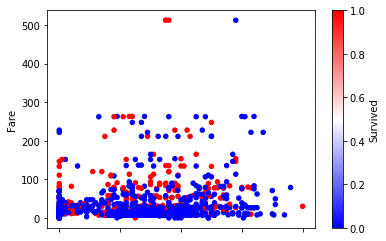

In [90]:
## visualize how Agem Fare is affecting the survival
df.plot.scatter(x="Age", y="Fare", c="Survived", colormap='bwr')

In [91]:
x = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [92]:
x

PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  \
0               1       3    1  22.0      1      0    7.2500         1   
1               2       1    0  38.0      1      0   71.2833         0   
2               3       3    0  26.0      0      0    7.9250         1   
3               4       1    0  35.0      1      0   53.1000         1   
4               5       3    1  35.0      0      0    8.0500         1   
...           ...     ...  ...   ...    ...    ...       ...       ...   
1304         1305       3    1   0.0      0      0    8.0500         1   
1305         1306       1    0  39.0      0      0  108.9000         0   
1306         1307       3    1  38.5      0      0    7.2500         1   
1307         1308       3    1   0.0      0      0    8.0500         1   
1308         1309       3    1   0.0      1      1   22.3583         0   

      WikiId  Age_wiki  Class  
0      691.0      22.0    3.0  
1       90.0      35.0    1.0  
2      865.0      26.0    3.0  
3      127.0      35.0    1.0  
4      627.0      35.0    3.0  
...      ...       ...    ...  
1304  1227.0      23.0    3.0  
1305   229.0      39.0    1.0  
1306  1169.0      43.0    3.0  
1307  1289.0      34.0    3.0  
1308   702.0       4.0    3.0  

[1309 rows x 11 columns]

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#x_train.shape, y_train.shape
x_test.shape, y_test.shape

((262, 11), (262,))

In [94]:

model = GaussianNB().fit(x_train, y_train)

In [115]:
model.predict([[1, 3, 1, 22.0, 1, 0, 7.2500, 1, 691.0, 22.0, 3.0]]) #delete the ID value

array([0.])